## Importing all the required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/forest-cover-type-dataset/covtype.csv


## Loading the data

In [2]:
df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Data Dictionary

In [3]:
text = """
Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
"""

columns = """Name / Data Type / Measurement / Description"""


def data_dictionary():
    col_name = []
    data_type = []
    measurement = []
    description = []
    
    for items in text.split('\n'):

        if len(items.split(' /')) == 1:
            pass
        else:
            col_name.append(items.split(' /')[0])
            data_type.append(items.split(' /')[1])
            measurement.append(items.split(' /')[2])
            description.append(items.split(' /')[3])
    
    
    data_dict = pd.DataFrame({'Name':col_name, 'DataType': data_type, 'Measurement': measurement, 'Description': description})
    
    return data_dict


    
        
data_dictionary()

,Name,DataType,Measurement,Description
0,Elevation,quantitative,meters,Elevation in meters
1,Aspect,quantitative,azimuth,Aspect in degrees azimuth
2,Slope,quantitative,degrees,Slope in degrees
3,Horizontal_Distance_To_Hydrology,quantitative,meters,Horz Dist to nearest surface water features
4,Vertical_Distance_To_Hydrology,quantitative,meters,Vert Dist to nearest surface water features
5,Horizontal_Distance_To_Roadways,quantitative,meters,Horz Dist to nearest roadway
6,Hillshade_9am,quantitative,0 to 255 index,"Hillshade index at 9am, summer solstice"
7,Hillshade_Noon,quantitative,0 to 255 index,"Hillshade index at noon, summer soltice"
8,Hillshade_3pm,quantitative,0 to 255 index,"Hillshade index at 3pm, summer solstice"
9,Horizontal_Distance_To_Fire_Points,quantitative,meters,Horz Dist to nearest wildfire ignition points


We have a total of 55 columns, out of which 40 columns are of different soiltype, 4 columns are of wilderness area.

## Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

### lets check for some missing values

In [5]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Good, we don't have any null values to deal with

### Lets look at the target

In [6]:
sorted(df['Cover_Type'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [7]:
df['Cover_Type'].value_counts().sort_index()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

We are dealing with some imbalanced data

# EDA

### Column Inspection

1. Elevation

In [8]:
df['Elevation'].describe()

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64

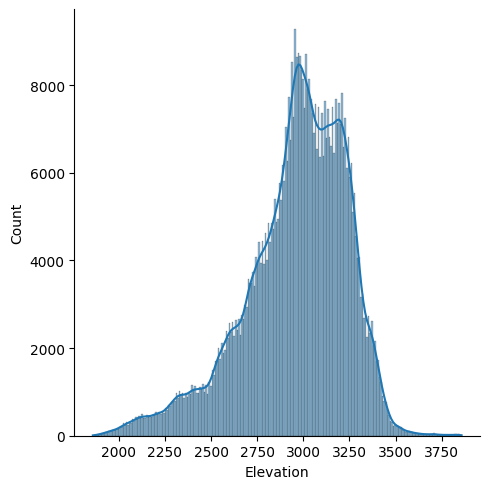

In [9]:
sns.displot(df['Elevation'], kde=True)
plt.show()

2. Aspect

In [10]:
df['Aspect'].describe()

count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64

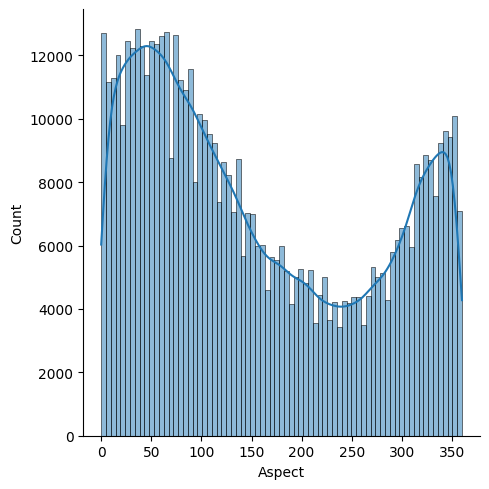

In [11]:
sns.displot(df['Aspect'], kde=True)
plt.show()

This graph makes sense its an angle measurement i.e its measure in degrees (0-360)

3. Slope

In [12]:
df['Slope'].describe()

count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64

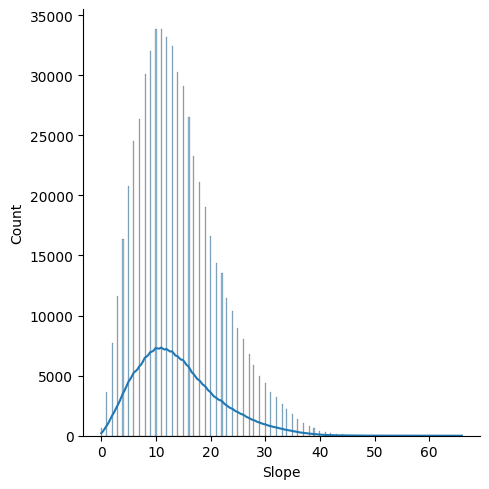

In [13]:
sns.displot(df['Slope'], kde=True)
plt.show()

## lets check for the skewness in our data

In [14]:
print('Skewness of the below features:')
print(df.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

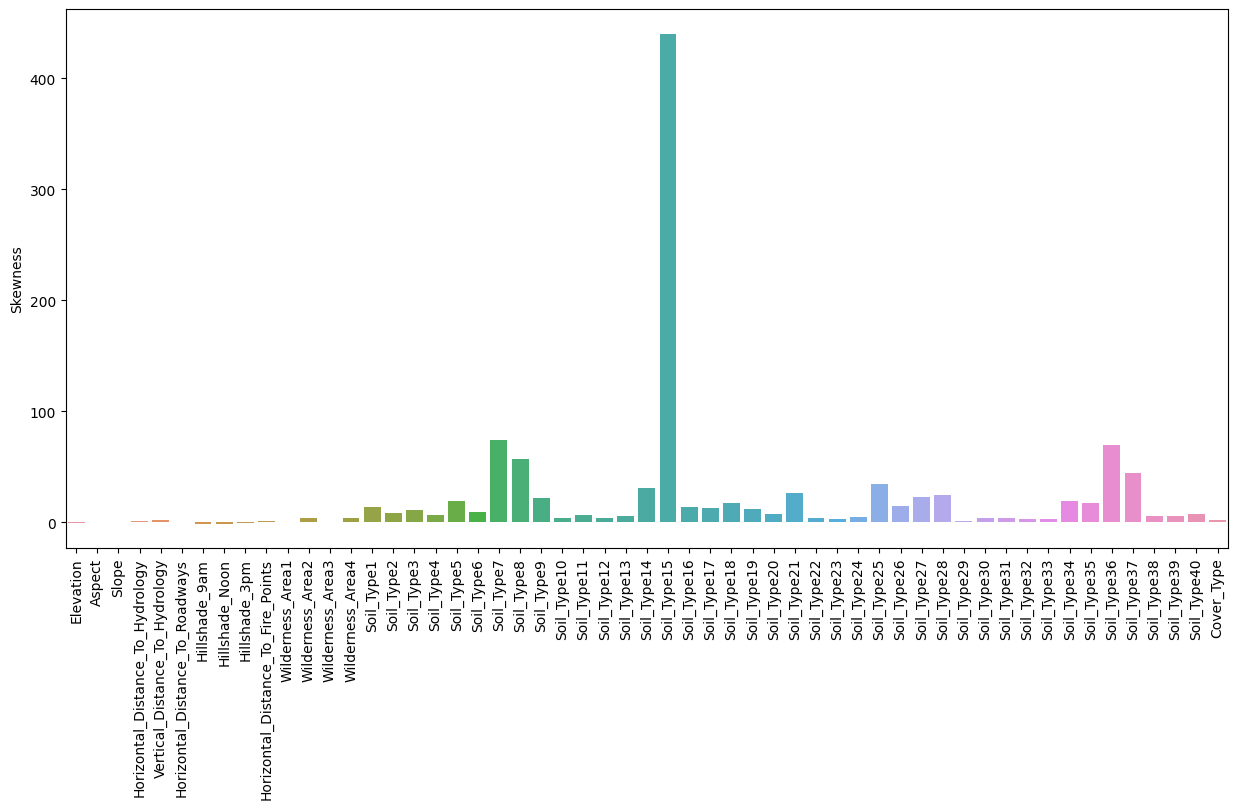

In [15]:
skew=df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)
plt.show()

Some of the columns are very heavily skewed and needs to be corrected/adjusted or dropped later on

## Class Imbalance

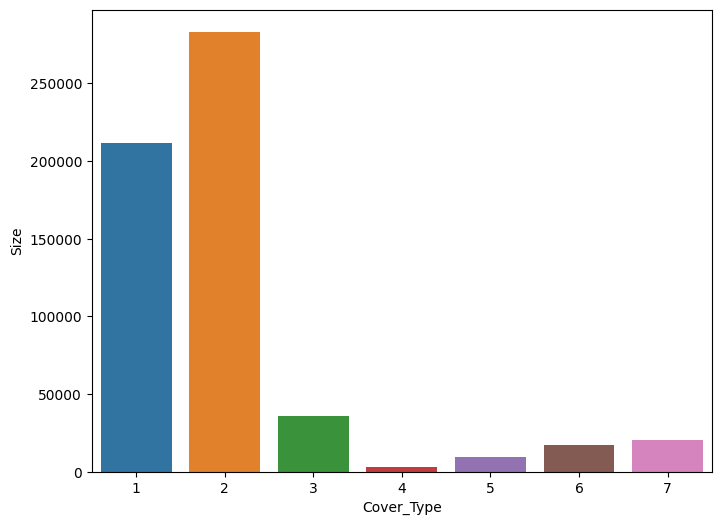

In [16]:
class_dist=df.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)
plt.show()

In [17]:
c1 = []
c2 = []

for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    c1.append('Cover_Type_' + str(class_dist.index[i]))
    c2.append("{:.2f}%".format(percent))
    
df_type_perc = pd.DataFrame({'CoverType':c1,
              'perc':c2})

df_type_perc

,CoverType,perc
0,Cover_Type_1,36.46%
1,Cover_Type_2,48.76%
2,Cover_Type_3,6.15%
3,Cover_Type_4,0.47%
4,Cover_Type_5,1.63%
5,Cover_Type_6,2.99%
6,Cover_Type_7,3.53%


In [18]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

## Bi-Variate Analysis

In [59]:
def plot_histogram(df, hue = None):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    sns.displot(x = df, hue = hue, kind='kde')
    plt.title(f'Datapoint distribution of {df.name}')
    plt.show()
    


def plot_countplot(df, n=100, hue = None ):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df, hue = hue,  order=pd.value_counts(df).iloc[:n].index)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df,x=10,y=6):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(x,y))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)

Lets splitup the columns based on binary and non_binary

In [60]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [64]:
hillshade = ['Hillshade_9am','Hillshade_Noon','Hillshade_3pm']
wilderness_area = ['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
soil_type = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5','Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
             'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14','Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18','Soil_Type19',
             'Soil_Type20', 'Soil_Type21', 'Soil_Type22','Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26','Soil_Type27', 'Soil_Type28',
             'Soil_Type29', 'Soil_Type30','Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34','Soil_Type35', 'Soil_Type36', 'Soil_Type37',
             'Soil_Type38','Soil_Type39', 'Soil_Type40']
rest_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']

------------Column: Hillshade_9am-------------
count    581012.000000
mean        212.146049
std          26.769889
min           0.000000
25%         198.000000
50%         218.000000
75%         231.000000
max         254.000000
Name: Hillshade_9am, dtype: float64


<Figure size 1000x600 with 0 Axes>

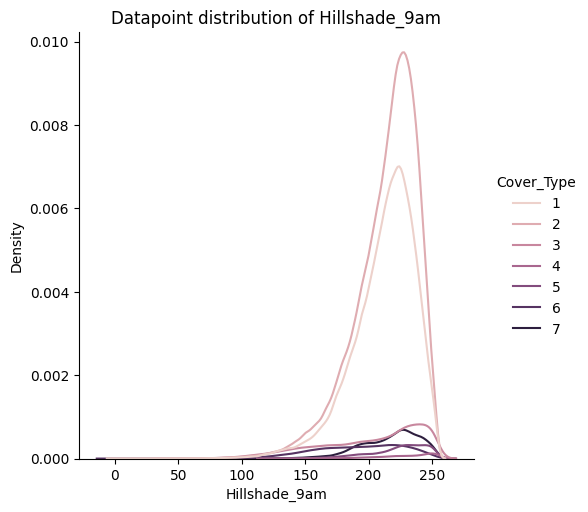

------------Column: Hillshade_Noon-------------
count    581012.000000
mean        223.318716
std          19.768697
min           0.000000
25%         213.000000
50%         226.000000
75%         237.000000
max         254.000000
Name: Hillshade_Noon, dtype: float64


<Figure size 1000x600 with 0 Axes>

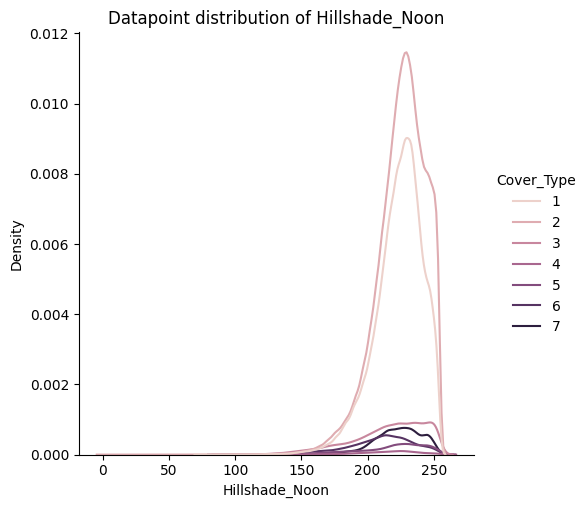

------------Column: Hillshade_3pm-------------
count    581012.000000
mean        142.528263
std          38.274529
min           0.000000
25%         119.000000
50%         143.000000
75%         168.000000
max         254.000000
Name: Hillshade_3pm, dtype: float64


<Figure size 1000x600 with 0 Axes>

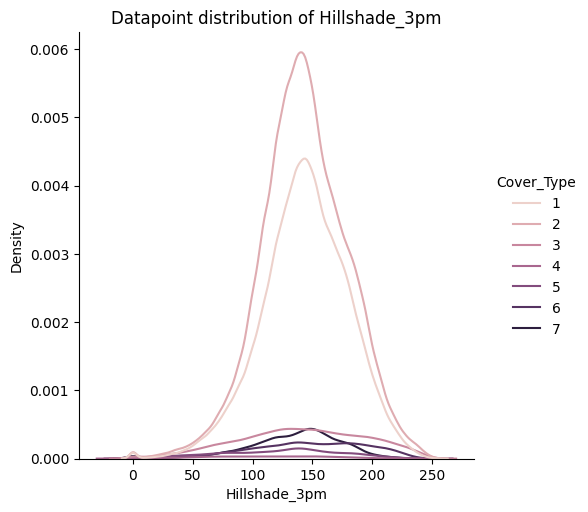

In [62]:
for cols in hillshade:
    print(f'------------Column: {cols}-------------')
    plot_histogram(df[cols], hue=df['Cover_Type'])

### Looks like the CoverType 1 and 2 has the highest Hillshade index comparitive

------------Column: Elevation-------------
count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64


<Figure size 1000x600 with 0 Axes>

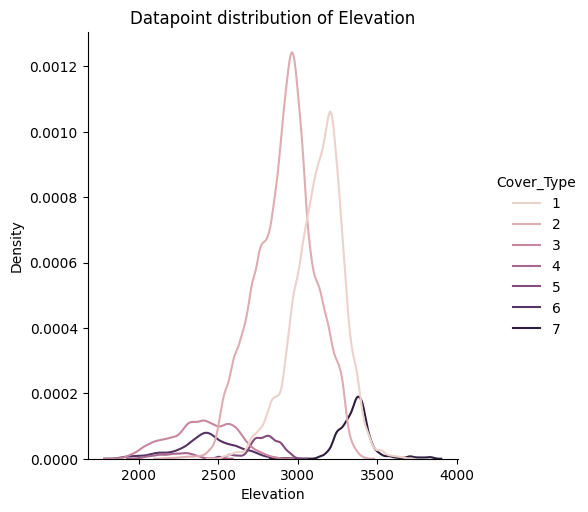

------------Column: Aspect-------------
count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64


<Figure size 1000x600 with 0 Axes>

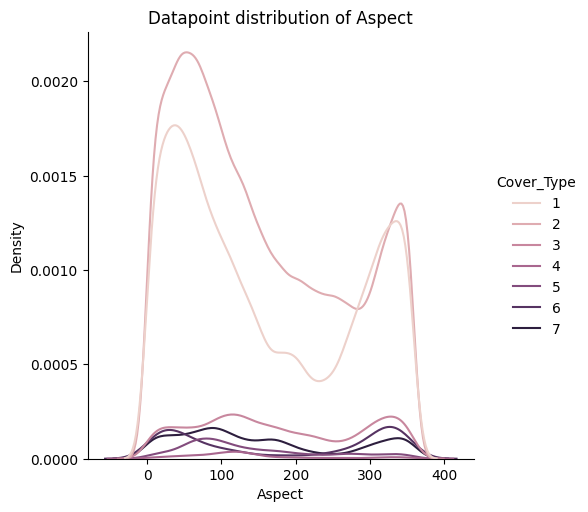

------------Column: Slope-------------
count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64


<Figure size 1000x600 with 0 Axes>

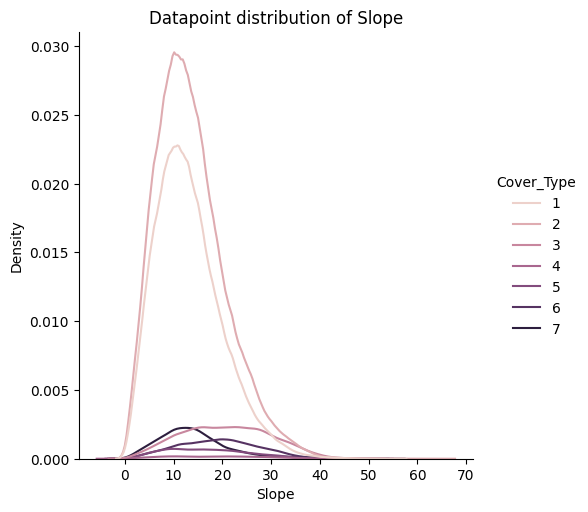

------------Column: Horizontal_Distance_To_Hydrology-------------
count    581012.000000
mean        269.428217
std         212.549356
min           0.000000
25%         108.000000
50%         218.000000
75%         384.000000
max        1397.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64


<Figure size 1000x600 with 0 Axes>

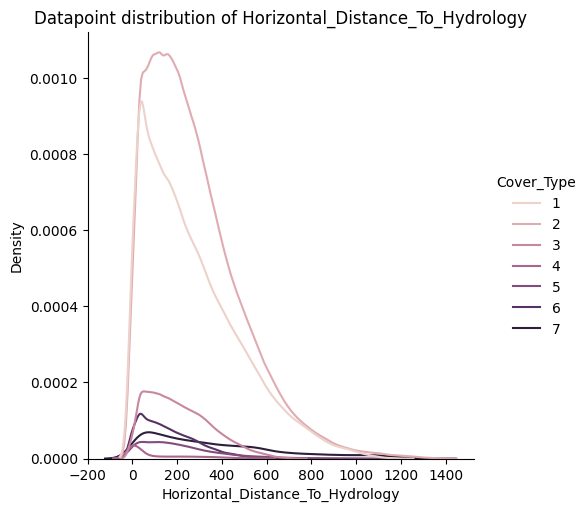

------------Column: Vertical_Distance_To_Hydrology-------------
count    581012.000000
mean         46.418855
std          58.295232
min        -173.000000
25%           7.000000
50%          30.000000
75%          69.000000
max         601.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64


<Figure size 1000x600 with 0 Axes>

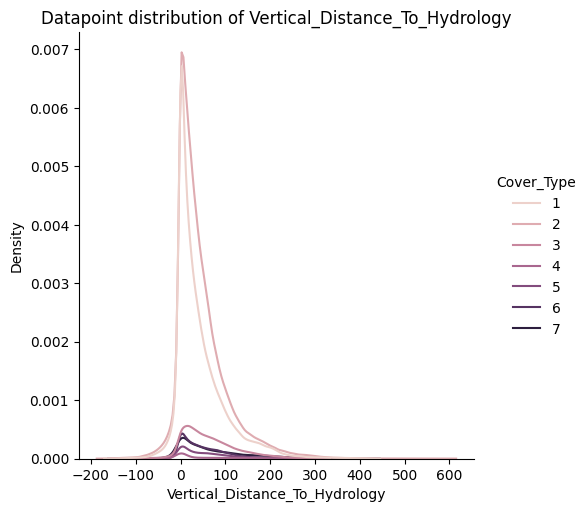

------------Column: Horizontal_Distance_To_Roadways-------------
count    581012.000000
mean       2350.146611
std        1559.254870
min           0.000000
25%        1106.000000
50%        1997.000000
75%        3328.000000
max        7117.000000
Name: Horizontal_Distance_To_Roadways, dtype: float64


<Figure size 1000x600 with 0 Axes>

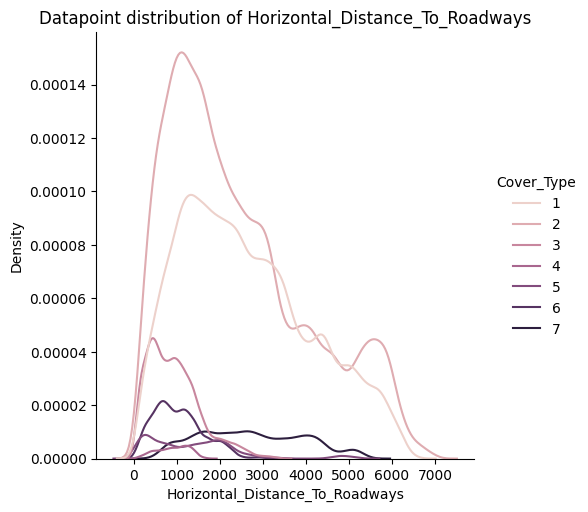

------------Column: Horizontal_Distance_To_Fire_Points-------------
count    581012.000000
mean       1980.291226
std        1324.195210
min           0.000000
25%        1024.000000
50%        1710.000000
75%        2550.000000
max        7173.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64


<Figure size 1000x600 with 0 Axes>

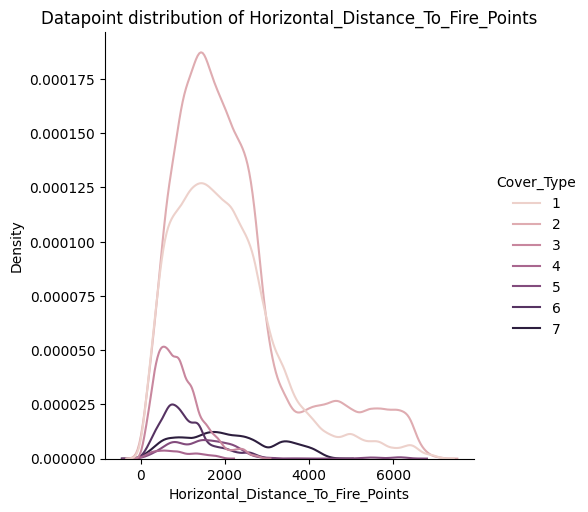

In [63]:
for cols in rest_cols:
    print(f'------------Column: {cols}-------------')
    plot_histogram(df[cols], hue=df['Cover_Type'])

### Looks like the CoverType 1 and 2 has the highest specs for the remaining columns

In [78]:
for cols in soil_type:
    print(df[cols].value_counts().reset_index())

   Soil_Type1   count
0           0  577981
1           1    3031
   Soil_Type2   count
0           0  573487
1           1    7525
   Soil_Type3   count
0           0  576189
1           1    4823
   Soil_Type4   count
0           0  568616
1           1   12396
   Soil_Type5   count
0           0  579415
1           1    1597
   Soil_Type6   count
0           0  574437
1           1    6575
   Soil_Type7   count
0           0  580907
1           1     105
   Soil_Type8   count
0           0  580833
1           1     179
   Soil_Type9   count
0           0  579865
1           1    1147
   Soil_Type10   count
0            0  548378
1            1   32634
   Soil_Type11   count
0            0  568602
1            1   12410
   Soil_Type12   count
0            0  551041
1            1   29971
   Soil_Type13   count
0            0  563581
1            1   17431
   Soil_Type14   count
0            0  580413
1            1     599
   Soil_Type15   count
0            0  581009
1            1 

### Inference, there are few soil features which has very few records overall. Lets us now find the soil features which has an overall count less than 1000

In [80]:
for cols in soil_type:
    count = df[cols].value_counts()[1]
    if count < 1000:
        print(cols, count)

Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


### these are some of the soil type for which we have very less data points. Now the idea is if the column doesn't have much variance to it we can drop it.

In [117]:
def plot_boxplot(df=None,x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    #plt.figure(figsize=(10,6))
    #plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(data=df,x,y)

SyntaxError: non-default argument follows default argument (1360889389.py, line 1)

In [108]:
df['Cover_Type']=df['Cover_Type'].astype('category') #To convert target class into category

plot_boxplot()
#plot_boxplot(xaxis=df['Cover_Type'])

TypeError: plot_boxplot() missing 2 required positional arguments: 'xaxis' and 'yaxis'

### Exploring the data a bit more

In [20]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
cont_data - Data without binary features i.e continuous features
binary_Data - Data having all binary features [Wilderness Areas + Soil Types]
wilderness_Data - Binary Wilderness Areas
Soil_Data - Binary Soil Types

________________________________

# Model Building

## Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [ ]:
X = df.iloc[:,:-1]
y = df['Cover_Type']

In [ ]:
#Features to be removed before the model
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

#Remove the unwanted features
X.drop(rem, axis=1, inplace=True)

In [ ]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print("----------------------------")
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier()

clf.fit(X_train_scaled,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
## Accuracy: 
print(f'Accuracy: {accuracy_score(y_pred,y_test)}')

## F1 Score: 
print(f"F1 Score: {f1_score(y_pred,y_test,average='macro')}")


In [ ]:
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
%%time
MLA = []
# Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
#      GradientBoostingClassifier()]
# X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
#      "GradientBoostingClassifier"]

Z = [RandomForestClassifier()]
X = ['RandomForestClassifier']

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train_scaled , y_train )
    pred = model.predict(X_test_scaled)
    MLA.append(accuracy_score(pred , y_test))

In [ ]:
## F1 Score: 
print(f"F1 Score: {f1_score(pred,y_test,average='macro')}")

In [ ]:
df.std().sort_values().head(10).sort_index()

In [ ]:
#Features to be removed before the model
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']